In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

d:\Prog\Pyth\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 64)       │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,154 (422.48 KB)

 Trainable params: 108,154 (422.48 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [6]:
epochs = 10
history = model.fit(
  train_images,
  train_labels,
  epochs = epochs
)

Epoch 1/10


d:\Prog\Pyth\venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8900 - loss: 0.3324
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9855 - loss: 0.0452
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9898 - loss: 0.0330
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9917 - loss: 0.0255
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9933 - loss: 0.0202
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9948 - loss: 0.0163
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9956 - loss: 0.0129
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9958 - loss: 0.0118
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9975 - loss: 0.0081


## Visualise Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

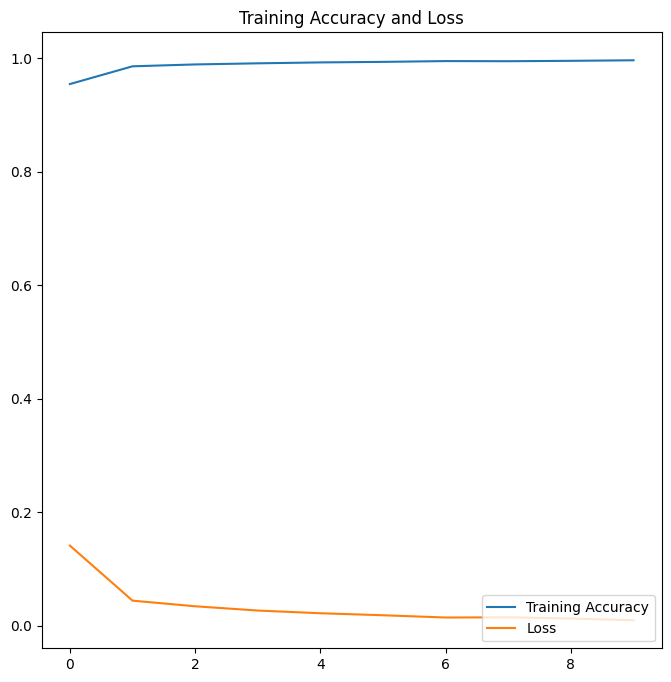

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


## Test Image

Prediction of model: 0


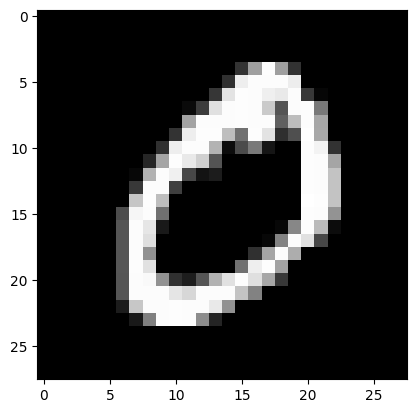

In [8]:
image = (train_images[1]).reshape(1,28,28,1)
predictions = model.predict(image, verbose=0)
model_pred = np.argmax(predictions, axis=1)

plt.imshow(image.reshape(28, 28), cmap='gray')
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 4


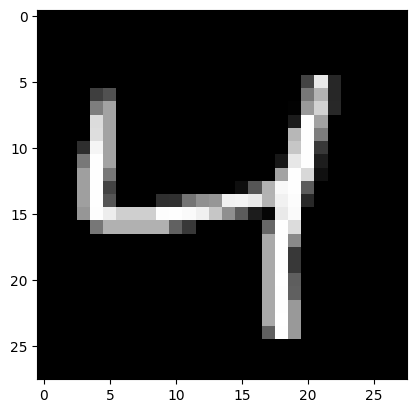

In [9]:
image = (train_images[2]).reshape(1, 28, 28, 1)
predictions = model.predict(image, verbose=0)
model_pred = np.argmax(predictions, axis=1)

plt.imshow(image.reshape(28, 28), cmap='gray')
print('Prediction of model: {}'.format(model_pred[0]))


## Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


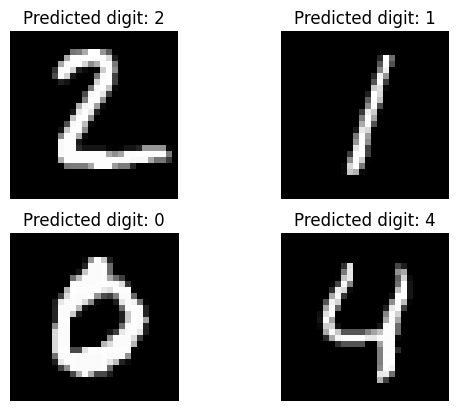

In [10]:
images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print("Test images array shape: {}".format(images.shape))

for i, test_image in enumerate(images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1, 28, 28, 1)
    prediction = np.argmax(model.predict(test_image, verbose=0), axis=1)

    print("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220 + i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap='gray')

plt.show()


## Save Model

In [11]:
model.save("tf-cnn-model.h5")

## Load Model

In [12]:
loaded_model = models.load_model("tf-cnn-model.h5")

Prediction of model: 4


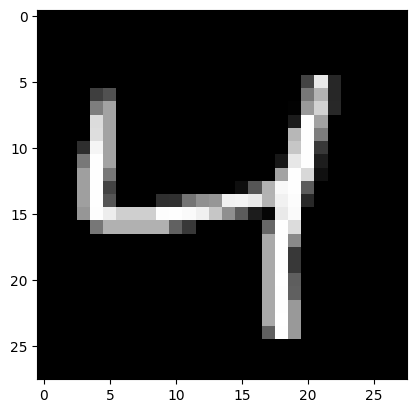

In [13]:
image = (train_images[2]).reshape(1, 28, 28, 1)
predictions = loaded_model.predict(image, verbose=0)
model_pred = np.argmax(predictions, axis=1)

plt.imshow(image.reshape(28, 28), cmap='gray')
print('Prediction of model: {}'.format(model_pred[0]))


## Upload Images to predict:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


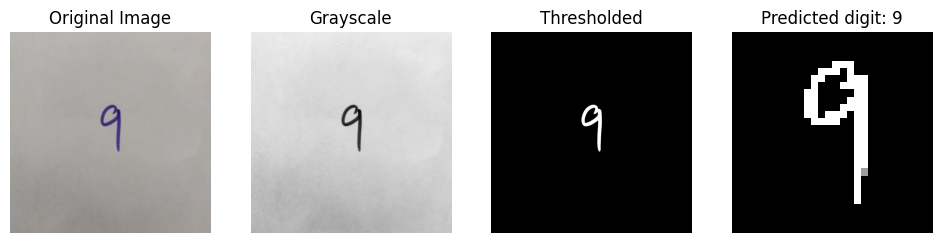

Predicted digit: 9


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import load_model # type: ignore

def predict_custom_image_opencv():
    image_path = r"C:\Users\Rahul\Desktop\DIP Images\9.jpg"  # Update path as needed

    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image.")
        return

    plt.figure(figsize=(15, 3))
    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 5, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    plt.subplot(1, 5, 3)
    plt.imshow(thresh, cmap='gray')
    plt.title("Thresholded")
    plt.axis('off')

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    digit = thresh[y:y+h, x:x+w]
    #plt.subplot(1, 5, 4)
    #plt.imshow(digit, cmap='gray')
    #plt.title("Cropped Digit")
    #plt.axis('off')

    rows, cols = digit.shape
    if rows > cols:
        factor = 20.0 / rows
        rows = 20
        cols = int(round(cols * factor))
    else:
        factor = 20.0 / cols
        cols = 20
        rows = int(round(rows * factor))
    digit_resized = cv2.resize(digit, (cols, rows))

    colsPadding = (int(np.ceil((28 - cols) / 2.0)), int(np.floor((28 - cols) / 2.0)))
    rowsPadding = (int(np.ceil((28 - rows) / 2.0)), int(np.floor((28 - rows) / 2.0)))
    padded = np.pad(digit_resized, (rowsPadding, colsPadding), 'constant', constant_values=0)

    final_image = padded / 255.0
    final_image = final_image.reshape(1, 28, 28, 1)

    model = load_model("tf-cnn-model.h5")
    prediction = np.argmax(model.predict(final_image), axis=1)[0]

    plt.subplot(1, 5, 4)
    plt.imshow(padded, cmap='gray')
    plt.title(f"Predicted digit: {prediction}")
    plt.axis('off')

    plt.show()

    print(f"Predicted digit: {prediction}")

predict_custom_image_opencv()
